In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import awkward as ak
import mplhep as hep
from numba import njit

In [2]:
with uproot.open("/N/project/ceem_coherent/CENNS750/sim_out/3885603/output_comp.root:CENNS") as cenns:
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()
    genz = cenns['genz'].array()
    genx = cenns['genx'].array()
    geny = cenns['geny'].array()
z = ak.zip({"en": en, "chans": chans, "top": top, "genx": genx, "geny": geny, "genz": genz}, depth_limit=1)

In [3]:
@njit
def detector_response(events):
    lys = []
    ens = []
    for event in events:
        ly = []
        good_tops = []
        good_bots = []
        for top, chan in zip(event['top'], event['chans']):
            if top and len(chan) > 1:
                good_tops.append(True)
            elif top:
                good_tops.append(False)
            elif not top and len(chan) > 1:
                good_bots.append(True)
            elif not top:
                good_bots.append(False)
            ly.append(len(chan))
        if np.any(np.array(good_tops)) and np.any(np.array(good_bots)):
            total = 0
            for l in ly:
                total += l
            lys.append(total)
            ens.append(event['en'] * 1000)
    return lys, ens

In [4]:
lys, ens = detector_response(z)

In [13]:
h = Hist(hist.axis.Regular(100, 0, 200, name='Recoil energy [keV]'), hist.axis.Regular(100, 0, 500, name='PEs'))
h.fill(ens, lys)

Hist(
  Regular(100, 0, 200, name='Recoil energy [keV]'),
  Regular(100, 0, 500, name='PEs'),
  storage=Double()) # Sum: 119069.0 (119079.0 with flow)

Text(0.5, 1.0, 'COH-Ar-750 Ar40 Response Matrix')

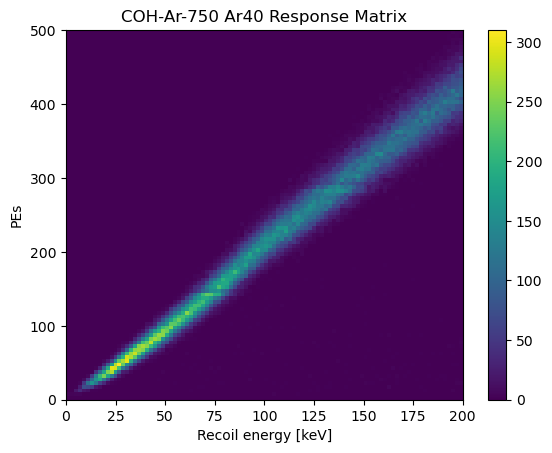

In [14]:
w, x, y = h.to_numpy()
fig, ax = plt.subplots()
mesh = ax.pcolormesh(x, y, w.T)
ax.set_xlabel("Recoil energy [keV]")
ax.set_ylabel("PEs")
fig.colorbar(mesh)
ax.set_title("COH-Ar-750 Ar40 Response Matrix")

In [15]:
fig.savefig('/N/project/ceem_coherent/CENNS750/sim_out/plots/ar40_response_matrix.png')

In [16]:
np.save('../data/cohar750_ar40_response_matrix', w)